In [0]:
df = spark.read.csv("/FileStore/tables/2017_StPaul_MN_Real_Estate.csv",inferSchema=True,header=True)
#df.write.parquet("/tmp/output/Real_Estate.parq")
df = spark.read.parquet("/tmp/output/Real_Estate.parq")
df = df.withColumnRenamed("No.","NO")
columns = df.columns
columns

Out[146]: ['NO',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PoolDescription',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'UNITNUMBER',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'backonmarketdate',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6',
 'RoomArea7',
 'RoomFloor7',
 'RoomArea8',
 'RoomFloor8',
 'Bedrooms',
 'SQFTBELOWGROUND',
 'AssumableMortgage',
 'AssociationFee',
 'ASSESSMENTPENDING',
 'AssessedValuation']

In [0]:
Y_df = df.select(['SALESCLOSEPRICE'])
Y_df.describe().show()

+-------+------------------+
summary| SALESCLOSEPRICE|
+-------+------------------+
 count| 5000|
 mean| 262804.4668|
 stddev|140559.82591998563|
 min| 48000|
 max| 1700000|
+-------+------------------+

In [0]:
def check_load(df,num_records,num_columns):
  msg = "Validation Failed"
  if num_records == df.count():
    if num_columns == len(df.columns):
      msg = "Validation Passed"
  return msg

check_load(df,5000,74)  

Out[148]: 'Validation Passed'

In [0]:
actual_dtypes_list = df.dtypes
validation_dict = {"MLSID":"string","StreetNumberNumeric":"integer"} # this dict should be created according to the analyst understanding of varaibles

for attribite in actual_dtypes_list:
  column_name = attribite[0]
  if column_name in validation_dict:
    column_type = attribite[1]
    if column_type in validation_dict[column_name]:
      print(column_name+" has expected dtype")

MLSID has expected dtype
StreetNumberNumeric has expected dtype

In [0]:
corr_max = 0
corr_max_col = columns[0]
column_name = []

for attribite in actual_dtypes_list:
  if attribite[1] != "string":
    column_name.append(attribite[0])

for col in column_name:
  corr_val = df.corr('SALESCLOSEPRICE', col)
  if corr_max < corr_val:
    corr_max = corr_val
    corr_max_col = col
    print(corr_max_col)

NO
SalesClosePrice

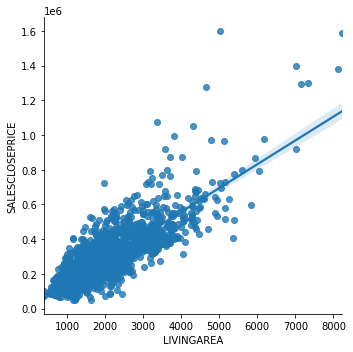

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show()

[Row(skewness(LISTPRICE)=2.790448093916559)]

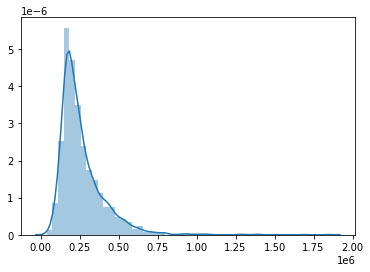

In [0]:
from pyspark.sql.functions import skewness
sample_df = df.select("LISTPRICE").sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()
sns.distplot(pandas_df)
print(df.agg({'LISTPRICE': 'skewness'}).collect())

In [0]:
df.select('STREETNUMBERNUMERIC','FIREPLACES','LOTSIZEDIMENSIONS','LISTTYPE','ACRES').show(30)
cols_to_drop = ['STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']
df = df.drop(str(cols_to_drop))

+-------------------+----------+--------------------+---------------+-----+
STREETNUMBERNUMERIC|FIREPLACES| LOTSIZEDIMENSIONS| LISTTYPE|ACRES|
+-------------------+----------+--------------------+---------------+-----+
 11511| 0| 279X200|Exclusive Right| 1.28|
 11200| 0| 100x140|Exclusive Right| 0.32|
 8583| 0| 120x296|Exclusive Right|0.822|
 9350| 1| 208X208|Exclusive Right| 0.94|
 2915| 1| 116x200|Exclusive Right| 0.0|
 3604| 1| 50x150|Exclusive Right|0.172|
 9957| 0| common|Exclusive Right| 0.05|
 9934| 0| common|Exclusive Right| 0.05|
 9926| 0| common|Exclusive Right| 0.05|
 9928| 0| common|Exclusive Right| 0.05|
 9902| 0| common|Exclusive Right| 0.05|
 9904| 0| common|Exclusive Right| 0.05|
 9894| 0| common|Exclusive Right| 0.05|
 9892| 0| COMMON|Exclusive Right| 0.05|
 9295| 1|261 x 293 x 287 x...|Exclusive Right|1.661|
 9930| 0| 36X32|Exclusive Right| 0.05|
 9898| 0| 36X32|Exclusive Right| 0.05|
 9924| 0| COMMON|Exclusive Right| 0.05|
 9906| 0| COMMON|Exclusive Right| 0.05|
 9938| 0| COMMON|Exclusive Right| 0.05|
 9795| 1| 32X60|Exclusive Right| 0.04|
 9797| 1| 32X60|Exclusive Right| 0.04|
 8909| 2| 125x150|Exclusive Right| 0.43|
 3597| 2| 100x250|Exclusive Right|0.574|
 8656| 1| 151x158x130x151|Exclusive Right|0.498|
 9775| 1| 36X32|Exclusive Right| 0.04|
 8687| 2| -|Exclusive Right| 1.03|
 8367| 0| 285x305|Exclusive Right|1.995|
 2866| 0| Irregular|Exclusive Right| 0.72|
 9793| 1| 42x60|Exclusive Right| 0.06|
+-------------------+----------+--------------------+---------------+-----+
only showing top 30 rows

In [0]:
df.select(['ASSUMABLEMORTGAGE']).distinct().show()
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']
text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)
print(df.count())

+-------------------+
 ASSUMABLEMORTGAGE|
+-------------------+
 Yes w/ Qualifying|
 Information Coming|
 null|
Yes w/No Qualifying|
 Not Assumable|
+-------------------+

4976

In [0]:
from pyspark.sql.functions import mean, stddev

mean_val = df.agg({'SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'SalesClosePrice': 'stddev'}).collect()[0][0]

low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

df = df.where((df['SalesClosePrice'] < low_bound) | (df['SalesClosePrice'] > hi_bound))

In [0]:
import pyspark.sql.functions as F

max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]

df = df.withColumn('percentagescaleddays',F.round((df['DAYSONMARKET'] - min_days) / (max_days - min_days)) * 100)

print(df.agg({'percentagescaleddays': 'max'}).collect())
print(df.agg({'percentagescaleddays': 'min'}).collect())

[Row(max(percentagescaleddays)=100.0)]
[Row(min(percentagescaleddays)=0.0)]

In [0]:
def min_max_scaler(df, cols_to_scale):
  for col in cols_to_scale:
    max_days = df.agg({col: 'max'}).collect()[0][0]
    min_days = df.agg({col: 'min'}).collect()[0][0]
    new_column_name = 'scaled_' + col
    df = df.withColumn(new_column_name,(df[col] - min_days) / (max_days - min_days))
  return df
df = min_max_scaler(df, ['DAYSONMARKET'])
df[['DAYSONMARKET', 'scaled_DAYSONMARKET']].show()

+------------+--------------------+
DAYSONMARKET| scaled_DAYSONMARKET|
+------------+--------------------+
 0| 0.0|
 0| 0.0|
 25| 0.12626262626262627|
 123| 0.6212121212121212|
 68| 0.3434343434343434|
 10|0.050505050505050504|
 82| 0.41414141414141414|
 98| 0.494949494949495|
 159| 0.803030303030303|
 23| 0.11616161616161616|
 152| 0.7676767676767676|
 1|0.005050505050505051|
 3|0.015151515151515152|
 14| 0.0707070707070707|
 44| 0.2222222222222222|
 35| 0.17676767676767677|
 111| 0.5606060606060606|
 52| 0.26262626262626265|
 12| 0.06060606060606061|
 19| 0.09595959595959595|
+------------+--------------------+
only showing top 20 rows

In [0]:
print(df.agg({'YEARBUILT': 'skewness'}).collect())

max_year = df.agg({'YEARBUILT': 'max'}).collect()[0][0]

df = df.withColumn('Reflect_YearBuilt', (max_year + 1) - df['YEARBUILT'])
df = df.withColumn('adj_yearbuilt', 1 / F.log(df['Reflect_YearBuilt']))

[Row(skewness(YEARBUILT)=-0.3338938806524002)]

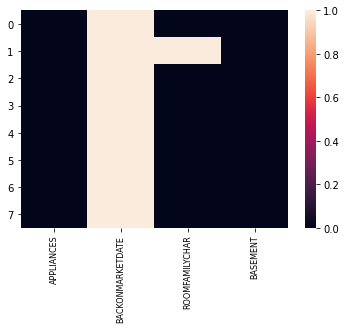

In [0]:
sample_df = df.select("APPLIANCES","BACKONMARKETDATE","ROOMFAMILYCHAR","BASEMENT").sample(False, 0.1, 42)
pandas_df = sample_df.toPandas()
tf_df = pandas_df.isnull()

sns.heatmap(tf_df)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.show()

answer = 'BACKONMARKETDATE'

In [0]:
missing = df.where(df['PDOM'].isNull()).count()
col_mean = df.agg({'PDOM': 'mean'}).collect()[0][0]
df.fillna(col_mean, subset=['PDOM'])
print(missing)

0

In [0]:
def column_dropper(df, threshold):
  total_records = df.count()
  for col in df.columns:
    missing = df.where(df[col].isNull()).count()
    missing_percent = missing / total_records
    if missing_percent > threshold:
      df = df.drop(col)
  return df

df = column_dropper(df, 0.6)

In [0]:
## data frame not available

In [0]:
## data frame not available

In [0]:
## data frame not available

In [0]:
acres_to_sqfeet = 43560
df = df.withColumn('LOT_SIZE_SQFT', df['ACRES'] * acres_to_sqfeet)

df = df.withColumn('YARD_SIZE', df['LOT_SIZE_SQFT'] - df['FOUNDATIONSIZE'])

print("Corr ofACRES vs SALESCLOSEPRICE: " + str(df.corr('ACRES', 'SALESCLOSEPRICE')))

print("Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: " + str(df.corr('FOUNDATIONSIZE', 'SALESCLOSEPRICE')))

print("Corr ofYARD_SIZE vs SALESCLOSEPRICE: " + str(df.corr('YARD_SIZE', 'SALESCLOSEPRICE')))

Corr ofACRES vs SALESCLOSEPRICE: 0.21561483797198408
Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: 0.4417441898900512
Corr ofYARD_SIZE vs SALESCLOSEPRICE: 0.20205536276853717

In [0]:
df = df.withColumn('ASSESSED_TO_LIST', df['ASSESSEDVALUATION']/df['LISTPRICE'])
df[['ASSESSEDVALUATION', 'LISTPRICE', 'ASSESSED_TO_LIST']].show(5)

df = df.withColumn('TAX_TO_LIST', df['TAXES']/df['LISTPRICE'])
df[['TAX_TO_LIST', 'TAXES', 'LISTPRICE']].show(5)

df = df.withColumn('BED_TO_BATHS', df['BEDROOMS']/df['BATHSTOTAL'])
df[['BED_TO_BATHS', 'BEDROOMS', 'BATHSTOTAL']].show(5)

+-----------------+---------+----------------+
ASSESSEDVALUATION|LISTPRICE|ASSESSED_TO_LIST|
+-----------------+---------+----------------+
 0.0| 720407| 0.0|
 0.0| 724205| 0.0|
 0.0| 729000| 0.0|
 0.0| 780000| 0.0|
 0.0| 799000| 0.0|
+-----------------+---------+----------------+
only showing top 5 rows

+--------------------+-----+---------+
 TAX_TO_LIST|TAXES|LISTPRICE|
+--------------------+-----+---------+
1.138245464022420...| 82| 720407|
 0.0| 0| 724205|
0.008921810699588478| 6504| 729000|
 0.0| 0| 780000|
0.009474342928660826| 7570| 799000|
+--------------------+-----+---------+
only showing top 5 rows

+------------------+--------+----------+
 BED_TO_BATHS|BEDROOMS|BATHSTOTAL|
+------------------+--------+----------+
1.3333333333333333| 4| 3|
 1.0| 5| 5|
1.3333333333333333| 4| 3|
 1.0| 5| 5|
0.8333333333333334| 5| 6|
+------------------+--------+----------+
only showing top 5 rows

+-------+-------------------+
summary| BATHS_PER_1000SQFT|
+-------+-------------------+
 count| 79|
 mean| 1.0115125218363832|
 stddev|0.17077522789155472|
 min| 0.6625807520291536|
 max| 1.7530678687703483|
+-------+-------------------+

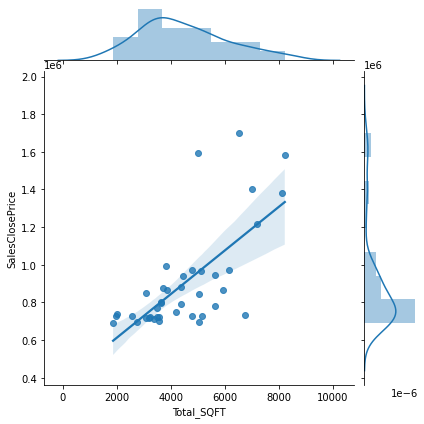

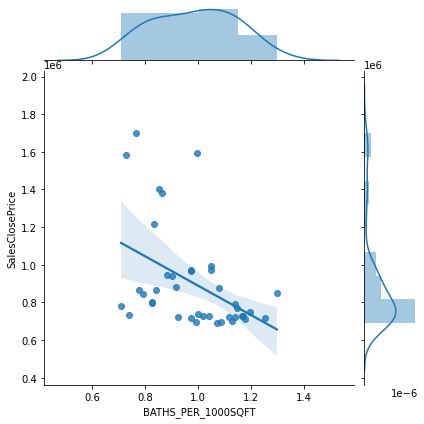

In [0]:
df = df.withColumn('Total_SQFT', df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND'])
df = df.withColumn('BATHS_PER_1000SQFT', df['BATHSTOTAL'] / (df['Total_SQFT'] / 1000))
df[['BATHS_PER_1000SQFT']].describe().show()

pandas_df = df.sample(False, 0.5, 0).toPandas()

sns.jointplot(x='Total_SQFT', y='SalesClosePrice', data=pandas_df, kind="reg")
plt.show()
sns.jointplot(x='BATHS_PER_1000SQFT', y='SalesClosePrice', data=pandas_df, kind="reg")
plt.show()

In [0]:
from pyspark.sql.functions import to_date, dayofweek

df = df.withColumn('LISTDATE', to_date(df.LISTDATE,'yyyy-MM-dd'))
df = df.withColumn('List_Day_of_Week', dayofweek('LISTDATE'))
sample_df = df.sample(False, 0.5, 42).toPandas()

#sns.countplot(x="List_Day_of_Week", data=sample_df)
#plt.show()

In [0]:
# datasets not available

In [0]:
# datasets not available

In [0]:
from pyspark.sql.functions import when

has_attached_garage = df['GARAGEDESCRIPTION'].like('%AttachedGarage%')
has_detached_garage = df['GARAGEDESCRIPTION'].like('%DetachedGarage%')

df = df.withColumn('has_attached_garage', (when(has_attached_garage, 1).when(has_detached_garage, 0).otherwise(None)))
df[['GARAGEDESCRIPTION', 'has_attached_garage']].show(truncate=100)

+-----------------------------------------------------------------------------------------+-------------------+
 GARAGEDESCRIPTION|has_attached_garage|
+-----------------------------------------------------------------------------------------+-------------------+
 Attached Garage, Insulated Garage, Driveway - Asphalt, Garage Door Opener| null|
 Attached Garage, Driveway - Asphalt, Garage Door Opener| null|
 Attached Garage, Insulated Garage, Driveway - Concrete, Garage Door Opener| null|
 Attached Garage, Driveway - Asphalt, Garage Door Opener| null|
 Attached Garage, Insulated Garage, Heated Garage, Driveway - Asphalt, Garage Door Opener| null|
 Attached Garage, Driveway - Asphalt, Garage Door Opener| null|
 Attached Garage, Heated Garage, Driveway - Concrete, Garage Door Opener| null|
 Attached Garage, Driveway - Concrete, Garage Door Opener, Other| null|
Attached Garage, Insulated Garage, Heated Garage, Driveway - Concrete, Garage Door Opener| null|
 Attached Garage, Insulated Garage, Driveway - Asphalt| null|
 Attached Garage, Driveway - Asphalt, Garage Door Opener| null|
 Attached Garage, Insulated Garage, Driveway - Other Surface, Garage Door Opener| null|
 Heated Garage, Underground Garage, Assigned| null|
 Detached Garage, Driveway - Concrete, Garage Door Opener| null|
 Attached Garage, Insulated Garage, Garage Door Opener| null|
 Attached Garage, Insulated Garage, Garage Door Opener| null|
 Heated Garage, Underground Garage, Secured, Assigned, Garage Door Opener| null|
 Detached Garage| null|
 Detached Garage, Driveway - Concrete, Garage Door Opener| null|
 Detached Garage| null|
+-----------------------------------------------------------------------------------------+-------------------+
only showing top 20 rows

In [0]:
from pyspark.sql.functions import split, explode

df = df.withColumn('garage_list', split(df['GARAGEDESCRIPTION'], ', '))
ex_df = df.withColumn('ex_garage_list', explode(df['garage_list']))

ex_df[['ex_garage_list']].distinct().show(100, truncate=50)

+-------------------------+
 ex_garage_list|
+-------------------------+
 Attached Garage|
 Garage Door Opener|
No Int Access to Dwelling|
 Heated Garage|
 Underground Garage|
 Other|
 Driveway - Other Surface|
 Secured|
 Detached Garage|
 Driveway - Asphalt|
 Assigned|
 Tuckunder|
 Insulated Garage|
 Driveway - Concrete|
 Tandem|
 Driveway - Shared|
+-------------------------+

In [0]:
from pyspark.sql.functions import coalesce, first

piv_df = ex_df.groupBy('NO').pivot('ex_garage_list').agg(coalesce(first('PricePerTSFT')))
joined_df = df.join(piv_df, on='NO', how='left')

zfill_cols = piv_df.columns
zfilled_df = joined_df.fillna(0, subset=zfill_cols)

In [0]:
from pyspark.ml.feature import Binarizer

binarizer = Binarizer(threshold=5.0, inputCol='List_Day_of_Week',outputCol='Listed_On_Weekend')
#df = binarizer.transform(df)
#df[['List_Day_of_Week', 'Listed_On_Weekend']].show()

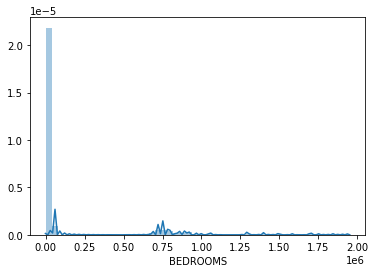

+--------+--------+
BEDROOMS|bedrooms|
+--------+--------+
 4.0| 4.0|
 5.0| 5.0|
 4.0| 4.0|
 5.0| 5.0|
 5.0| 5.0|
 5.0| 5.0|
 4.0| 4.0|
 4.0| 4.0|
 5.0| 5.0|
 4.0| 4.0|
 5.0| 5.0|
 4.0| 4.0|
 3.0| 3.0|
 5.0| 5.0|
 5.0| 5.0|
 5.0| 5.0|
 2.0| 2.0|
 5.0| 5.0|
 4.0| 4.0|
 5.0| 5.0|
+--------+--------+
only showing top 20 rows

In [0]:
from pyspark.ml.feature import Bucketizer

sample_df = df.select(column_name).sample(False, 0.5, 42).toPandas()
sns.distplot(sample_df, axlabel='BEDROOMS')
plt.show()

splits = [0, 1, 2, 3, 4, 5, float('Inf')]
buck = Bucketizer(splits=splits, inputCol='Bedrooms', outputCol='bedrooms')

df_bucket = buck.transform(df)
df_bucket[['BEDROOMS', 'bedrooms']].show()

In [0]:
from datetime import timedelta

def train_test_split_date(df, split_col, test_days=45):
  max_date = df.agg({split_col: 'max'}).collect()[0][0]
  min_date = df.agg({split_col: 'min'}).collect()[0][0]
  split_date = to_date(lit(max_date))
  return split_date

split_date = train_test_split_date(df, 'offmarketdate')

train_df = df.where(df['offmarketdate'] < split_date)
test_df = df.where(df['offmarketdate'] >= split_date).where(df['LISTDATE'] <= split_date)

In [0]:
from pyspark.sql.functions import datediff, to_date, lit

split_date = to_date(lit('2017-12-10'))

test_df = df.where(df['offmarketdate'] >= split_date).where(df['LISTDATE'] <= split_date)
test_df = test_df.withColumn('DAYSONMARKET_Original', test_df['DAYSONMARKET'])

test_df = test_df.withColumn('DAYSONMARKET', datediff(split_date, test_df['LISTDATE']))

test_df[['LISTDATE', 'offmarketdate', 'DAYSONMARKET_Original', 'DAYSONMARKET']].show()

+--------+-------------+---------------------+------------+
LISTDATE|offmarketdate|DAYSONMARKET_Original|DAYSONMARKET|
+--------+-------------+---------------------+------------+
+--------+-------------+---------------------+------------+

In [0]:
obs_threshold = 30
cols_to_remove = list()

for col in column_name:
  obs_count = df.agg({col: 'sum'}).collect()[0][0]
if obs_count <= obs_threshold:
  cols_to_remove.append(col)
  new_df = df.drop(*cols_to_remove)
  print('Rows: ' + str(df.count()) + ' Columns: ' + str(len(df.columns)))
  print('Rows: ' + str(new_df.count()) + ' Columns: ' + str(len(new_df.columns)))


In [0]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

cat_col = []
for attribite in actual_dtypes_list:
  if attribite[1] == "string":
    cat_col.append(attribite[0])
    
df = df.fillna(-1, subset=cat_col[0:3])

indexers = [StringIndexer(inputCol=col, outputCol=col+"_IDX").setHandleInvalid("keep") for col in cat_col[0:3]]

indexer_pipeline = Pipeline(stages=indexers)
df_indexed = indexer_pipeline.fit(df).transform(df)

df_indexed = df_indexed.drop(*cat_col[0:3])
print(df_indexed.dtypes)

[('NO', 'int'), ('StreetNumberNumeric', 'int'), ('PostalCode', 'int'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'int'), ('LISTDATE', 'date'), ('LISTPRICE', 'int'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'int'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'int'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'int'), ('offmarketdate', 'string'), ('Fireplaces', 'int'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PDOM', 'int'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'int'), ('Taxes', 'int'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'int'), ('LivingArea', 'int'), ('YEARBUILT', 'int'), ('ZONING', 'string'), ('STYLE', 'string'), ('ACRES', 'double'), ('CoolingDescription', 'string'), ('APPLIANCES', 'string'), ('ROOMFAMILYCHAR', 'string'), ('RoomArea3', 'string'), ('EXTERIOR', 'string'), ('RoomFloor3', 'string'), ('RoomFloor2', 'string'), ('RoomArea2', 'string'), ('DiningRoomDescription', 'string'), ('BASEMENT', 'string'), ('BathsFull', 'int'), ('BathsHalf', 'int'), ('BATHQUARTER', 'int'), ('BATHSTHREEQUARTER', 'int'), ('Class', 'string'), ('BATHSTOTAL', 'int'), ('BATHDESC', 'string'), ('RoomArea5', 'string'), ('RoomFloor5', 'string'), ('RoomArea6', 'string'), ('RoomFloor6', 'string'), ('RoomArea7', 'string'), ('RoomFloor7', 'string'), ('RoomArea8', 'string'), ('RoomFloor8', 'string'), ('Bedrooms', 'int'), ('SQFTBELOWGROUND', 'int'), ('AssociationFee', 'int'), ('ASSESSMENTPENDING', 'string'), ('AssessedValuation', 'double'), ('percentagescaleddays', 'double'), ('scaled_DAYSONMARKET', 'double'), ('Reflect_YearBuilt', 'int'), ('adj_yearbuilt', 'double'), ('LOT_SIZE_SQFT', 'double'), ('YARD_SIZE', 'double'), ('ASSESSED_TO_LIST', 'double'), ('TAX_TO_LIST', 'double'), ('BED_TO_BATHS', 'double'), ('Total_SQFT', 'int'), ('BATHS_PER_1000SQFT', 'double'), ('List_Day_of_Week', 'int'), ('has_attached_garage', 'int'), ('garage_list', 'array<string>'), ('MLSID_IDX', 'double'), ('streetaddress_IDX', 'double'), ('STREETNAME_IDX', 'double')]

In [0]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler

features = list(column_name)
features.remove('SalesClosePrice')
vec = VectorAssembler(inputCols=features,outputCol='features')
df = vec.transform(df)

gbt =GBTRegressor(featuresCol='features',labelCol='SalesClosePrice',predictionCol="Prediction_Price",seed=42)
#model = gbt.fit(df)

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='SALESCLOSEPRICE',predictionCol='Prediction_Price')
#models = {'Gradient BoostedTrees': gbt_predictions, 'Random Forest Regression': rfr_predictions}
#for key, preds in models.items():
#rmse = evaluator.evaluate(preds, {evaluator.metricName: 'rmse'})
#r2 = evaluator.evaluate(preds, {evaluator.metricName: 'r2'})
#print(key + ' RMSE: ' + str(rmse))
#print(key + ' R^2: ' + str(r2))

In [0]:
## dataframe not given

In [0]:
## dataframe not given